## House Prize Prediction

We have data of sales of house in some area. For each house we have complete information about its size, prize, number of bedrooms and bathrooms, whether it is made of bricks and about neighbourhood.

#### Objective:

To build a predictive model for predicting the house prize based on given house features.

In [1]:
# importing libraries for data manipulation & plotting

import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from scipy import stats as stats
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
# importing libraries for stats modeling

import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics

#### Pre_modeling Step (Data audit report) 

In [3]:
data = pd.read_csv('E:/asubudhi/class/Class_2/2. Predicting House Prices/Book1.csv')
data.head()

,Home,Price,SqFt,Bedrooms,Bathrooms,Offers,Brick,Neighborhood
0,1,114300,1790,2,2,2,No,East
1,2,114200,2030,4,2,3,No,East
2,3,114800,1740,3,2,1,No,East
3,4,94700,1980,3,2,3,No,East
4,5,119800,2130,3,3,3,No,East


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 8 columns):
Home            128 non-null int64
Price           128 non-null int64
SqFt            128 non-null int64
Bedrooms        128 non-null int64
Bathrooms       128 non-null int64
Offers          128 non-null int64
Brick           128 non-null object
Neighborhood    128 non-null object
dtypes: int64(6), object(2)
memory usage: 8.1+ KB


In [5]:
data.describe()

,Home,Price,SqFt,Bedrooms,Bathrooms,Offers
count,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000
mean,64.500000,130427.343750,2000.937500,3.023438,2.445312,2.578125
std,37.094474,26868.770371,211.572431,0.725951,0.514492,1.069324
min,1.000000,69100.000000,1450.000000,2.000000,2.000000,1.000000
25%,32.750000,111325.000000,1880.000000,3.000000,2.000000,2.000000
50%,64.500000,125950.000000,2000.000000,3.000000,2.000000,3.000000
75%,96.250000,148250.000000,2140.000000,3.000000,3.000000,3.000000
max,128.000000,211200.000000,2590.000000,5.000000,4.000000,6.000000


In [ ]:
# To get all the details about the data in a single command
# The result is save in a html file named 'House_Prize_Data_Audit_Report.html' 

pandas_profiling.profileReport(data).to_file('House_Prize_Data_Audit_Report.html')

#### Modeling

##### Data Preparation step-1(addressing the issues found in data audit report)

In [6]:
# converting nominal categorical variable into continous variable

dummy_var = pd.get_dummies(data[['Brick','Neighborhood']], drop_first = True)
dummy_var.head()

,Brick_Yes,Neighborhood_North,Neighborhood_West
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0


In [7]:
# Joinning the previous data and the dummy variable data to form new data set. 

data_new = pd.concat([data,dummy_var],axis = 1)
data_new.head()

,Home,Price,SqFt,Bedrooms,Bathrooms,Offers,Brick,Neighborhood,Brick_Yes,Neighborhood_North,Neighborhood_West
0,1,114300,1790,2,2,2,No,East,0,0,0
1,2,114200,2030,4,2,3,No,East,0,0,0
2,3,114800,1740,3,2,1,No,East,0,0,0
3,4,94700,1980,3,2,3,No,East,0,0,0
4,5,119800,2130,3,3,3,No,East,0,0,0


In [8]:
# After convertion drop the nominal categorical variable

data_new.drop(['Brick','Neighborhood'], axis =1 , inplace = True)
data_new.head()

,Home,Price,SqFt,Bedrooms,Bathrooms,Offers,Brick_Yes,Neighborhood_North,Neighborhood_West
0,1,114300,1790,2,2,2,0,0,0
1,2,114200,2030,4,2,3,0,0,0
2,3,114800,1740,3,2,1,0,0,0
3,4,94700,1980,3,2,3,0,0,0
4,5,119800,2130,3,3,3,0,0,0


In [9]:
# Drop the variables having unique value
data_new.drop(['Home'], axis = 1, inplace = True)

In [10]:
# Outliers detection and it's treatment

def outliers_treat(x):
    x = x.clip_upper(x.quantile(0.99))
    x = x.clip_lower(x.quantile(0.01))
    return x

In [11]:
data_new = data_new.apply(outliers_treat)

C:\Users\DELL\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: clip_upper(threshold) is deprecated, use clip(upper=threshold) instead
  after removing the cwd from sys.path.
C:\Users\DELL\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: clip_lower(threshold) is deprecated, use clip(lower=threshold) instead
  """


In [12]:
# missing value detection and it's treatment

data_new.apply(lambda x: sum(x.isnull()))

Price                 0
SqFt                  0
Bedrooms              0
Bathrooms             0
Offers                0
Brick_Yes             0
Neighborhood_North    0
Neighborhood_West     0
dtype: int64

- As no missing value was found so no need to treat it.

#### Data Preparation step-2 (checking the assumption of the technique - here it is linear regression)

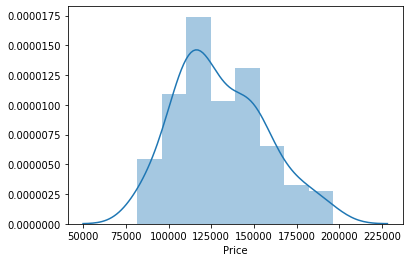

In [13]:
# Normality (the Y variable/dependent variable near about follows normal distribution)

sns.distplot(data_new.Price)

- it is near about normal but for more prominent results we can try to convert the variable using log transformation

In [14]:
ln_Price = np.log(data_new.Price)

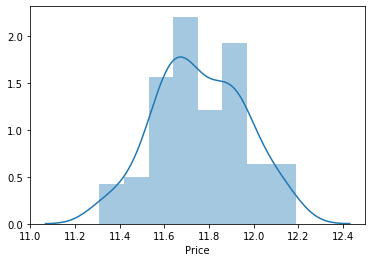

In [15]:
sns.distplot(ln_Price)

- we do not saw much of a improvement. So, we can continue with our default data or we can take the log tranformed Y variable. 

In [16]:
data_new.drop(['Price'],axis = 1, inplace = True)

In [17]:
data_new = pd.concat([data_new,ln_Price], axis = 1)
data_new.head()

,SqFt,Bedrooms,Bathrooms,Offers,Brick_Yes,Neighborhood_North,Neighborhood_West,Price
0,1790.0,2.0,2,2,0,0,0,11.646582
1,2030.0,4.0,2,3,0,0,0,11.645707
2,1740.0,3.0,2,1,0,0,0,11.650947
3,1980.0,3.0,2,3,0,0,0,11.458469
4,2130.0,3.0,3,3,0,0,0,11.693579


In [18]:
# Linearity (relationship between x and y variable should be linear)
# The result of correlation is saved in csv file named 'House_Prize_Correlation.csv'

corr_matrix = data_new.corr()
corr_matrix.to_csv('House_Prize_Correlation.csv')

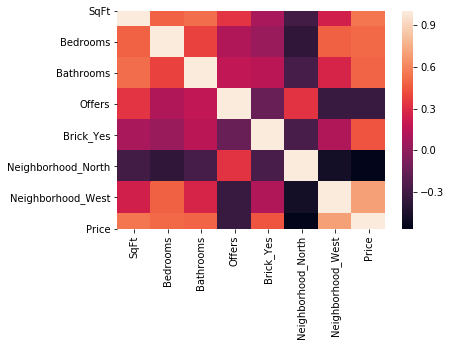

In [19]:
sns.heatmap(corr_matrix)

- Based on correlation matrix we can select all this feature's

In [20]:
features = data_new.iloc[:,0:7]

In [21]:
features.head()

,SqFt,Bedrooms,Bathrooms,Offers,Brick_Yes,Neighborhood_North,Neighborhood_West
0,1790.0,2.0,2,2,0,0,0
1,2030.0,4.0,2,3,0,0,0
2,1740.0,3.0,2,1,0,0,0
3,1980.0,3.0,2,3,0,0,0
4,2130.0,3.0,3,3,0,0,0


In [22]:
target = data_new.iloc[:,7]

In [23]:
target.head()

0    11.646582
1    11.645707
2    11.650947
3    11.458469
4    11.693579
Name: Price, dtype: float64

In [24]:
# Multicollinearity (checks if there is any relationship among x variable's)

vif = pd.DataFrame()
vif['Vif_Factor'] = [variance_inflation_factor(features.values,i) for i in range(features.shape[1])]
vif['Features'] = features.columns

In [25]:
vif

,Vif_Factor,Features
0,60.905710,SqFt
1,31.801929,Bedrooms
2,37.086275,Bathrooms
3,11.039705,Offers
4,1.634121,Brick_Yes
5,2.129110,Neighborhood_North
6,2.466554,Neighborhood_West


In [26]:
# Based on VIF value we will remove some of the independent variables and re-run the vif test.
features.drop(['Offers'],axis = 1, inplace = True)

In [27]:
vif = pd.DataFrame()
vif['Vif_Factor'] = [variance_inflation_factor(features.values,i) for i in range(features.shape[1])]
vif['Features'] = features.columns

In [28]:
vif

,Vif_Factor,Features
0,58.131548,SqFt
1,30.844187,Bedrooms
2,36.645578,Bathrooms
3,1.616251,Brick_Yes
4,1.980946,Neighborhood_North
5,2.169765,Neighborhood_West


In [29]:
features.drop(['Bathrooms'], axis = 1, inplace = True)

In [30]:
vif = pd.DataFrame()
vif['Vif_Factor'] = [variance_inflation_factor(features.values,i) for i in range(features.shape[1])]
vif['Features'] = features.columns

In [31]:
vif

,Vif_Factor,Features
0,31.094316,SqFt
1,30.394378,Bedrooms
2,1.597052,Brick_Yes
3,1.977632,Neighborhood_North
4,2.158438,Neighborhood_West


In [32]:
features.drop(['Bedrooms'], axis = 1, inplace = True)

In [33]:
vif = pd.DataFrame()
vif['Vif_Factor'] = [variance_inflation_factor(features.values,i) for i in range(features.shape[1])]
vif['Features'] = features.columns

In [34]:
vif

,Vif_Factor,Features
0,3.586662,SqFt
1,1.588754,Brick_Yes
2,1.955746,Neighborhood_North
3,1.898675,Neighborhood_West


#### Data Preparation Step - 3(feature engineering/ feature elemination)

- we donot need it for this case, as we have very less amount of feature remaining.

#### Data Preparation Step - 4

In [35]:
# Split the data into train and test set for validation of model

data_final = pd.concat([features,target], axis = 1)

In [36]:
train,test = train_test_split(data_final, test_size = 0.3 , random_state = 122)

In [37]:
# Model building

formula = 'Price ~ '+'+'.join(features.columns)
formula

'Price ~ SqFt+Brick_Yes+Neighborhood_North+Neighborhood_West'

In [38]:
lr_model = smf.ols('Price ~ SqFt+Brick_Yes+Neighborhood_North+Neighborhood_West',data=train)

In [39]:
lr_model = lr_model.fit()

In [40]:
print(lr_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.810
Method:                 Least Squares   F-statistic:                     94.96
Date:                Wed, 05 Aug 2020   Prob (F-statistic):           2.40e-30
Time:                        18:25:44   Log-Likelihood:                 95.722
No. Observations:                  89   AIC:                            -181.4
Df Residuals:                      84   BIC:                            -169.0
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             10.9959      0

In [41]:
# Final Equation
# Price = 0.0003*SqFt + 0.1419*Brick_Yes - 0.0620*Neighborhood_North + 0.2051*Neighborhood_West + 10.9959

In [42]:
train['Pred'] = lr_model.predict(train)

C:\Users\DELL\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [43]:
train.head()

,SqFt,Brick_Yes,Neighborhood_North,Neighborhood_West,Price,Pred
53,2100.0,0,1,0,11.781425,11.652226
92,2110.0,0,0,1,11.867799,11.922736
84,1530.8,0,1,0,11.413105,11.457543
74,2140.0,0,0,1,11.878957,11.932997
90,1920.0,0,0,1,11.871299,11.857750


In [44]:
# converting all the log values to its original value before calculating the error matrix

train['Actual_Price'] = np.exp(train.Price)
train['Actual_Pred'] = np.exp(train.Pred)
train.drop(['Price','Pred'], axis = 1, inplace = True)

C:\Users\DELL\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\DELL\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\DELL\Anaconda3\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the c

In [45]:
train.head()

,SqFt,Brick_Yes,Neighborhood_North,Neighborhood_West,Actual_Price,Actual_Pred
53,2100.0,0,1,0,130800.0,114946.922924
92,2110.0,0,0,1,142600.0,150653.199302
84,1530.8,0,1,0,90500.0,94612.364373
74,2140.0,0,0,1,144200.0,152206.985421
90,1920.0,0,0,1,143100.0,141174.284907


In [46]:
test['Pred'] = lr_model.predict(test)

C:\Users\DELL\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [47]:
# converting all the log values to its original value before calculating the error matrix

test['Actual_Price'] = np.exp(test.Price)
test['Actual_Pred'] = np.exp(test.Pred)
test.drop(['Price','Pred'], axis = 1, inplace = True)

C:\Users\DELL\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\DELL\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [48]:
# calculating the error metrix for train data

train_MAPE = (np.mean(np.abs(train.Actual_Price - train.Actual_Pred)/train.Actual_Price))*100
train_RMSE =np.mean(np.square(train.Actual_Price - train.Actual_Pred))
train_RMSPE =(np.mean(np.square((train.Actual_Price - train.Actual_Pred)/train.Actual_Price)))*100
train_corr = np.corrcoef(train.Actual_Price, train.Actual_Pred)[1][0]
print('The Mean Absolute Percentage Error for train data is',train_MAPE)
print('The Root Mean Square Error for train data is',train_RMSE)
print('The Root Mean Square Percentage Error is',train_RMSPE)
print('The correlation between actual and Predicted house prize is',train_corr)

The Mean Absolute Percentage Error for train data is 6.440058381472149
The Root Mean Square Error for train data is 113978519.38942927
The Root Mean Square Percentage Error is 0.6872511700742338
The correlation between actual and Predicted house prize is 0.9130618553100828


In [49]:
# calculating the error metrix for test data and as well as validating the model.

test_MAPE = (np.mean(np.abs(test.Actual_Price - test.Actual_Pred)/test.Actual_Price))*100
test_RMSE =np.mean(np.square(test.Actual_Price - test.Actual_Pred))
test_RMSPE =(np.mean(np.square((test.Actual_Price - test.Actual_Pred)/test.Actual_Price)))*100
test_corr = np.corrcoef(test.Actual_Price, test.Actual_Pred)[1][0]
print('The Mean Absolute Percentage Error for train data is',test_MAPE)
print('The Root Mean Square Error for train data is',test_RMSE)
print('The Root Mean Square Percentage Error is',test_RMSPE)
print('The correlation between actual and Predicted house prize is',test_corr)

The Mean Absolute Percentage Error for train data is 9.985541807090078
The Root Mean Square Error for train data is 197284125.24076402
The Root Mean Square Percentage Error is 1.7337108600904705
The correlation between actual and Predicted house prize is 0.8432537916782752


##### Decile Analysis

Decile analysis is a ranking analysis, where on the basis of independent/target variable the dataset is divided into 10 groups. Each group is given a rank, highest is 9 and lowest is 0.We can do the avearage or the sum of the values of a group.

Following are the characteristics of good model/the model is stable :
#1. If the higher rank decile is having higer value and lower rank decile has lower value for both actual and predicted, then we will say our each rank is predicted properly.
#2. The decrease of value from higher rank to lower rank should be linear.   

In [50]:
# For Training data

train['Deciles'] = pd.qcut(train['Actual_Pred'],10, labels = False)

C:\Users\DELL\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [51]:
# Calculating the mean of the deciles.

avg_actual = train[['Deciles','Actual_Price']].groupby(train.Deciles).mean().sort_index(ascending = False)['Actual_Price']
avg_pred = train[['Deciles','Actual_Pred']].groupby(train.Deciles).mean().sort_index(ascending = False)['Actual_Pred']
decile_analysis_train = pd.concat([avg_actual,avg_pred], axis = 1)
decile_analysis_train

,Actual_Price,Actual_Pred
Deciles,,
9,177405.777778,178859.469619
8,165888.888889,161066.855052
7,144455.555556,147866.619573
6,138877.777778,139543.669557
5,132100.000000,132647.297616
4,130600.000000,122776.750623
3,116055.555556,116982.232520
2,108577.777778,112374.690040
1,111928.571429,108771.128633


In [52]:
# For Test Data
# Calculating the mean of the deciles

test['Deciles'] = pd.qcut(test['Actual_Pred'],10, labels = False)
avg_actual = test[['Deciles','Actual_Price']].groupby(test.Deciles).mean().sort_index(ascending = False)['Actual_Price']
avg_pred = test[['Deciles','Actual_Pred']].groupby(test.Deciles).mean().sort_index(ascending = False)['Actual_Pred']
decile_analysis_test = pd.concat([avg_actual,avg_pred], axis = 1)
decile_analysis_test

C:\Users\DELL\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,Actual_Price,Actual_Pred
Deciles,,
9,165250.0,171791.104004
8,153375.0,151375.924065
7,142175.0,141605.421883
6,129450.0,134304.775507
5,125600.0,128332.811573
4,120825.0,121865.209294
3,105325.0,117157.335149
2,105850.0,111115.068521
1,108550.0,107278.929387


- The cofficient of determination (R- Square is higher). Thus, the selected features are able to describe 80% of the variability present in 'Y' variable. 
- The model is validation process shows statisfactory results, as the difference between the train MAPE and test MAPE is less than +/- 5%. 
- The model can be further improve if we add some aditional house feature such as the house is located near any hospital or market etc. 